
# Project for Data Processing Workshop III

## By Dr. Zhe Xuanyuan


## Modified from Udacity Neural Network tutorials

www.udacity.com


## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. 

There are four steps:

> Step 1: Load The Data

> Step 2: Dataset Summary & Exploration

> Step 3: Design and Test a Model Architecture

> Step 4: Test a Model on New Images

If you see "TODO: ", it means you need to finish the unfinished codes and run the block to see if its output is as expected.

If you see "COMMENTS: ", it means you need to read and understand the provided codes and write comments and explanation of the codes.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a report to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. In the report, you need to describe at least two problem encountered in setting up the development environment and implementing the codes, and the solutions to them.

In order to stand out for your project, you may also try to answer the following questions in your report:
- What is the accuracy of your model?
- How to increase the accuracy of your model?
- Can you use the model to classify other objects as well? What is the workflow?
- Can you use other models to classify the traffic signs? How to use new models?

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 1: Load The Data

- Download the data from 

> link: https://pan.baidu.com/s/1nrXQvs0EGI3bmK6jeN2nAw 

> code: 4eqc 

- put the data somewhere in your file system, e.g., the same fold with this notebook file
- the .p files are images and labels compressed together in a single file for convinient access

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = r"train.p"
validation_file = r"valid.p"
testing_file = r"test.p"

#  COMMENTS: reaing the .p files
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

#  COMMENTS: extract the useful data in the previous read variables
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# COMMENTS: check if the # of data equal to # of labels
assert (len(X_train) == len(y_train))
assert (len(X_valid) == len(y_valid))
assert (len(X_test) == len(y_test))

---

## Step 2: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traf"fic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = [26 25]
Number of classes = 43
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]


[]

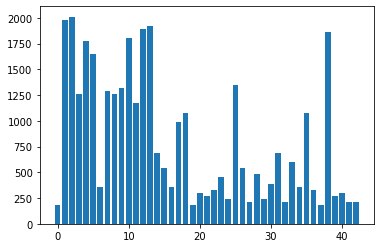

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import matplotlib.pyplot as plt
# % matplotlib inline

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_valid = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = train["sizes"][0]

# TODO: How many unique classes/labels there are in the dataset. Try "np.unique"
n_classes = len(np.unique(y_train))

# TODO: What are the IDs of the classes, how many samples of each class are in the training set. Try "np.unique".
class_id, class_counts = np.unique(y_train, return_counts=True)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print(class_id)
print(class_counts)

#TODO: Draw a bar chart that shows the number of samples of each class in training set, try plt.bar() and plt.show()

plt.bar(class_id, class_counts)
plt.plot()

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

5


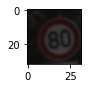

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random

# Visualizations will be shown in the notebook.

# COMMENTS: generate a random integer for viewing the data and corresponding label
index = random.randint(0, len(X_train) - 1)
image = X_train[index]

plt.figure(figsize=(1, 1))
plt.imshow(image, cmap="gray")
#plt.imshow(image)

# COMMENTS: 
print(y_train[index])

----

## Step 3: Implement and Test a Model Architecture

Implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).


Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.


### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

8


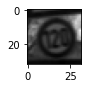

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import cv2


# This function uses OpenCV library to convert RGB color images into gray scale images, which contain only one color channel
def grayscale(img):
    grayimg = np.zeros((32, 32, 1))
    grayimg[:, :, 0] = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return grayimg


X_train, y_train = shuffle(X_train, y_train)

# COMMENTS: initialize the variable with correct shape
X_train_gray = np.zeros((len(X_train), 32, 32, 1))
X_valid_gray = np.zeros((len(X_valid), 32, 32, 1))
X_test_gray = np.zeros((len(X_test), 32, 32, 1))

# COMMENTS: loading data to the gray_variable
for i in range(len(X_train)):
    X_train_gray[i] = grayscale(X_train[i])

for i in range(len(X_valid)):
    X_valid_gray[i] = grayscale(X_valid[i])

for i in range(len(X_test)):
    X_test_gray[i] = grayscale(X_test[i])

image = X_train_gray[index][:, :, 0]
#print(X_train[index].shape())
plt.figure(figsize=(1, 1))

print(y_train[index])
# COMMENTS: viewing the result, check if it is correctly change into grey scale images
plt.imshow(image, cmap="gray")


### TensorFlow setup

In [5]:
#COMMENT: import the tensorflow package
# pip install --upgrade tensorflow==1.15 -i https://pypi.tuna.tsinghua.edu.cn/simple 
# tensorflow 1.x only works for python version <= 3.7.x
# if your python version is >= 3.8, you cannot install tensorflow 1.x
# import tensorflow as tf

# or if you have tensorflow 2.x, you can do the following
import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

# COMMENT: defined the training epochs and batch_size parameters
EPOCHS = 10  #
BATCH_SIZE = 128

### Model Architecture

In [6]:
# COMMENTS: What is this code block doing in general? Changing the higher dimensional data to a flatten representation.
def flatten(incoming, name=None):
    flat_shape = [-1, np.prod(incoming.shape[1:]).value]
    return tf.reshape(incoming, flat_shape)


#from tensorflow.contrib.layers import flatten

global_conv2 = tf.zeros((1, 5, 5, 16))


def LeNet(x):
    global global_conv2
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    global_conv2 = conv2

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes （43 here, number of classes).
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

## Features and Labels

In [7]:
# COMMENTS: define a run time variable, which means the value will be assign when running the code. And doing one-hot operation to dealing with multi-class classification problem
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Training Pipeline
Create a training pipeline that uses the model to classify Traffic Sign data.

In [8]:
rate = 0.001  # learning rate parameter

# COMMENTS: perform a forward propagation, get the prediction of the NN corresponding to x.
logits = LeNet(x)

# COMMENTS: initialize the loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

# COMMENTS: initialize the optimizer for gradient descent
optimizer = tf.train.AdamOptimizer(learning_rate=rate)  #AdamOptimizer
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
### Train the model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_gray, y_train = shuffle(X_train_gray, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid_gray, y_valid)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")

2022-05-24 13:19:39.255375: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-24 13:19:39.334660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 13:19:39.334799: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: NVIDIA GeForce RTX 3060 Laptop GPU major: 8 minor: 6 memoryClockRate(GHz): 1.425
pciBusID: 0000:01:00.0
2022-05-24 13:19:39.334864: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcudart.so.10.0'; dlerror: libcudart.so.10.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/frank/anaconda3/envs/ws-tsc/lib/python3.7/site-packages/cv2/../../lib64:
2022-05-24 13:19:39.334894: W tensorflow/stream_executor/platform/default/dso_loader

Training...

EPOCH 1 ...
Validation Accuracy = 0.723

EPOCH 2 ...
Validation Accuracy = 0.815

EPOCH 3 ...
Validation Accuracy = 0.828

EPOCH 4 ...
Validation Accuracy = 0.846

EPOCH 5 ...
Validation Accuracy = 0.860

EPOCH 6 ...
Validation Accuracy = 0.854

EPOCH 7 ...
Validation Accuracy = 0.872

EPOCH 8 ...
Validation Accuracy = 0.847

EPOCH 9 ...
Validation Accuracy = 0.862

EPOCH 10 ...
Validation Accuracy = 0.878

Model saved


## Test on the test set

In [11]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet


2022-05-24 13:20:10.373275: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-05-24 13:20:10.373304: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


Test Accuracy = 0.879


---

## Step 4: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg']
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


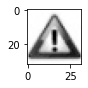

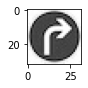

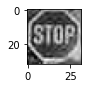

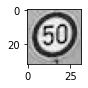

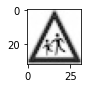

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import numpy as np
import cv2
import matplotlib.image as mpimg

#TODO: put the images you downloaded into the "online-images" folder, which is located in the same folder as this notebook
new_images = sorted(os.listdir(r"online-images"))
print(new_images)

new_image_data = np.zeros((len(new_images), 32, 32, 3))
new_image_gray = np.zeros((len(new_images), 32, 32, 1))

#TODO: check signnames.csv file and specify the class of your 5 downloaded traffic signs in the vector below
y_new_image = [18, 33, 14, 2, 27]

# COMMENTS: loading the image in to pre-defined variables
for i in range(len(new_images)):
    new_image_name = "online-images/" + new_images[i]
    new_image_data[i] = cv2.imread(new_image_name)
    image = new_image_data[i]
    print(image.shape)
    #cv2.namedWindow("image")
    #cv2.imshow("image", image)

    image = new_image_data[i].astype(np.uint16)

    new_image_gray[i] = grayscale(image)
    image = new_image_gray[i][:, :, 0]
    plt.figure(figsize=(1, 1))
    plt.imshow(image, cmap="gray")



### Predict the Sign Type for Each Image

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
prediction_sign = tf.argmax(logits, 1)
correct_prediction = tf.equal(prediction_sign, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


def predict_sign(X_data, y_data):
    num_examples = len(X_data)
    sign_class = np.zeros(len(X_data))
    sess = tf.get_default_session()
    sign_classes = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        sign_class = sess.run(prediction_sign, feed_dict={x: batch_x, y: batch_y})
        sign_classes += sign_class.tolist()
    return sign_classes


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    new_test_signs = predict_sign(new_image_gray, y_new_image)
    print("The signs in the pics are : ")
    print(new_test_signs)

INFO:tensorflow:Restoring parameters from ./lenet
The signs in the pics are : 
[18, 11, 14, 2, 28]


2022-05-24 13:20:11.154566: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-05-24 13:20:11.154601: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


### Analyze Performance

In [14]:
### TODO: Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
new_image_accuracy = np.sum(new_test_signs == y_new_image)/len(y_new_image)
print(new_image_accuracy)

0.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [15]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    a = sess.run(logits, feed_dict={x: new_image_gray})
    topk = sess.run(tf.nn.top_k(tf.constant(a), k=5))
    print(topk)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[100.65321   ,  17.569477  ,  16.89733   ,  16.261873  ,
         15.190714  ],
       [ 28.626833  ,  27.69697   ,   5.7418156 ,   5.536599  ,
         -0.11696967],
       [ 35.15679   ,  16.40071   ,  13.275472  ,   5.803975  ,
          4.1697183 ],
       [ 81.51754   ,  41.283875  ,  37.346504  ,  15.090631  ,
          5.898663  ],
       [ 21.395428  ,  11.618348  ,   7.395179  ,   7.0849967 ,
          6.8249216 ]], dtype=float32), indices=array([[18,  4,  1, 26, 11],
       [11, 33, 35, 39, 40],
       [14,  0,  2,  1, 38],
       [ 2,  5,  1,  7,  3],
       [28, 35, 34,  3, 20]], dtype=int32))


2022-05-24 13:20:11.230545: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-05-24 13:20:11.230579: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


## Extension

### Task 1

In [16]:
def acc_for_each(X_data, y_data):
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        prediction = predict_sign(X_data, y_data)
        print(sum(prediction == y_test)/len(y_test))
    acc = []
    for label in range(43):
        count = 0
        for i in range(len(prediction)):
            if prediction[i] == label and y_data[i] == label:
                count += 1
        print("label {}, acc {}".format(label ,count / sum(y_data==label)))
        acc.append(count / sum(y_data==label))
    return acc, prediction
acc, prediction = acc_for_each(X_test_gray, y_test)

INFO:tensorflow:Restoring parameters from ./lenet


2022-05-24 13:20:11.340567: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-05-24 13:20:11.340606: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      


0.8793349168646081
label 0, acc 0.6833333333333333
label 1, acc 0.9138888888888889
label 2, acc 0.964
label 3, acc 0.8955555555555555
label 4, acc 0.8727272727272727
label 5, acc 0.7888888888888889
label 6, acc 0.7933333333333333
label 7, acc 0.8133333333333334
label 8, acc 0.8844444444444445
label 9, acc 0.9604166666666667
label 10, acc 0.9590909090909091
label 11, acc 0.8690476190476191
label 12, acc 0.9666666666666667
label 13, acc 0.9069444444444444
label 14, acc 0.9037037037037037
label 15, acc 0.9666666666666667
label 16, acc 0.9866666666666667
label 17, acc 0.9027777777777778
label 18, acc 0.8153846153846154
label 19, acc 0.9666666666666667
label 20, acc 0.8555555555555555
label 21, acc 0.5333333333333333
label 22, acc 0.7666666666666667
label 23, acc 0.8466666666666667
label 24, acc 0.2777777777777778
label 25, acc 0.86875
label 26, acc 0.7722222222222223
label 27, acc 0.48333333333333334
label 28, acc 0.8066666666666666
label 29, acc 0.9333333333333333
label 30, acc 0.57333333

In [17]:
print('max acc: label {}, acc {}'.format(acc.index(max(acc)),max(acc)))

max acc: label 16, acc 0.9866666666666667


In [18]:
print('min acc: label {}, acc {}'.format(acc.index(min(acc)),min(acc)))

min acc: label 24, acc 0.2777777777777778


In [19]:
import pandas as pd
id_to_label = pd.read_csv("signnames.csv")
id_to_label.set_index("ClassId", inplace=True)
id_to_label.head()

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)


In [20]:
dict(id_to_label.iloc[16])

{'SignName': 'Vehicles over 3.5 metric tons prohibited'}

In [21]:
dict(id_to_label.iloc[27])

{'SignName': 'Pedestrians'}

### Task 2

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

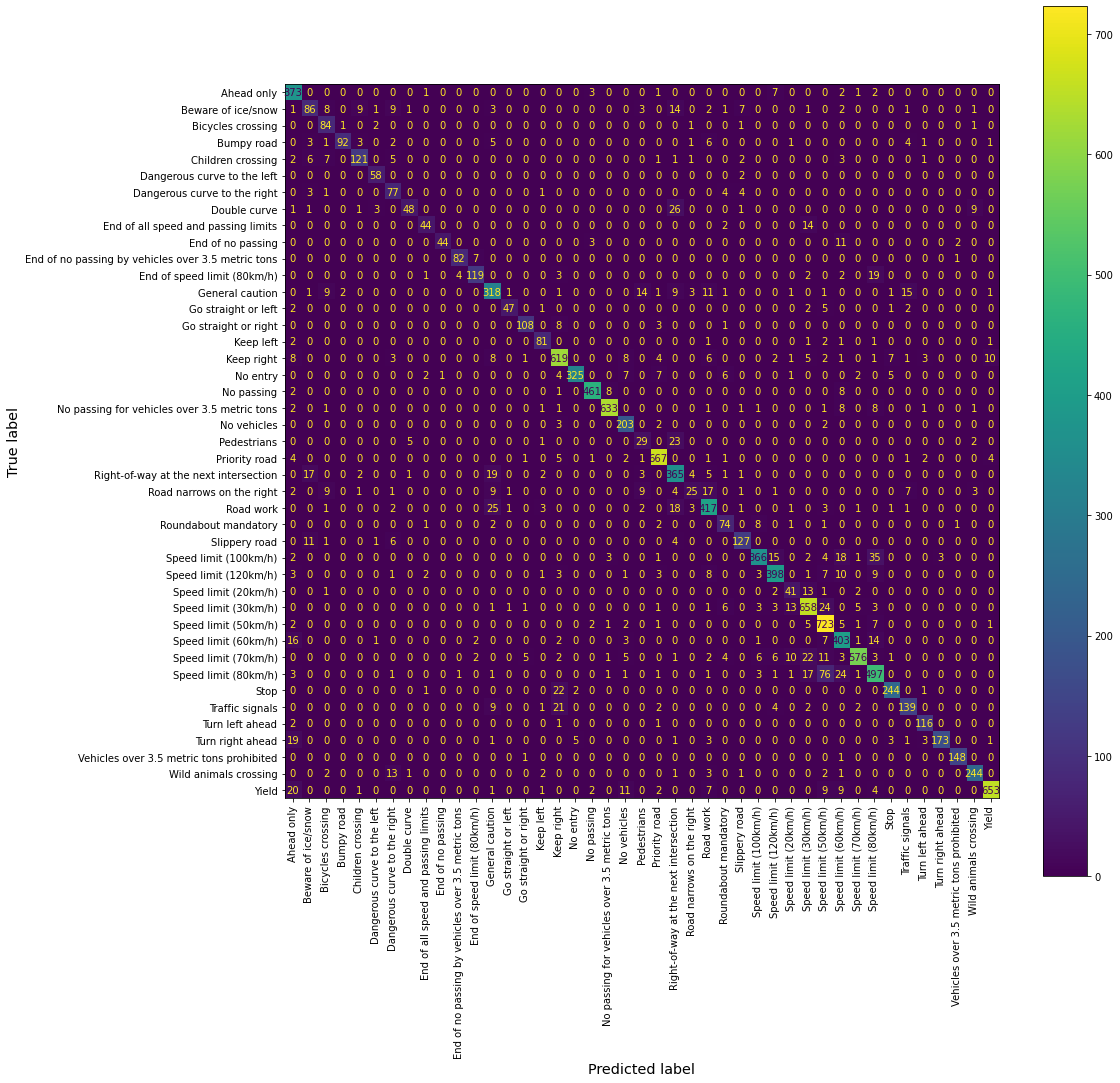

In [23]:
y_test_label = []
y_prediction_label = []
for i in y_test:
    y_test_label.append(id_to_label.iloc[i].SignName)

for i in prediction:
    y_prediction_label.append(id_to_label.iloc[i].SignName)



plt.figure(figsize=(16,16))
ax=plt.subplot(111)
disp = ConfusionMatrixDisplay.from_predictions(y_test_label, y_prediction_label, ax=ax)
plt.xticks(rotation=90)
plt.ylabel('True label', size="x-large")
plt.xlabel('Predicted label', size="x-large")
plt.show()

In [58]:
id_to_label.iloc[40]

SignName    Roundabout mandatory
Name: 40, dtype: object

In [59]:
id_to_label.iloc[7]

SignName    Speed limit (100km/h)
Name: 7, dtype: object

In [70]:
mis_classified = []
correct_classified = []
mis_ind = []
correct_ind = []
for i in range(len(prediction)):
    if prediction[i] != 40 and y_test[i] == 40:
        mis_classified.append(prediction[i])
        mis_ind.append(i)
    elif prediction[i] == 40 and y_test[i] == 40:
        correct_classified.append(prediction[i])
        correct_ind.append(i)

In [49]:
pd.Series(mis_classified).value_counts()

7     8
12    2
18    2
32    1
2     1
0     1
16    1
dtype: int64

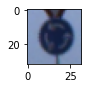

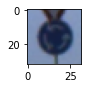

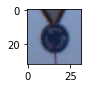

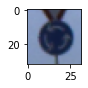

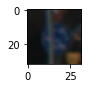

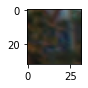

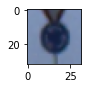

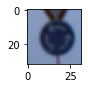

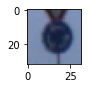

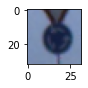

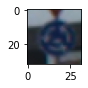

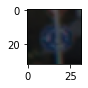

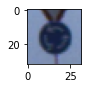

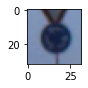

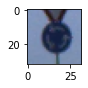

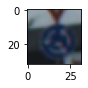

In [51]:
images = X_test[mis_ind]
images

for image in images:
    plt.figure(figsize=(1, 1))
    plt.imshow(image, cmap="gray")

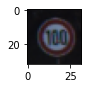

In [54]:
ind = list(y_test).index(7)
image = X_test[ind]
plt.figure(figsize=(1, 1))
plt.imshow(image, cmap="gray")

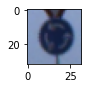

In [64]:
ind = list(y_test).index(40)
image = X_test[ind]
plt.figure(figsize=(1, 1))
plt.imshow(image, cmap="gray")

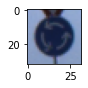

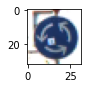

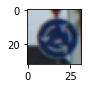

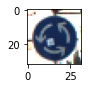

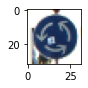

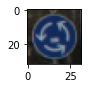

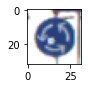

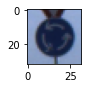

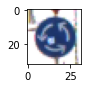

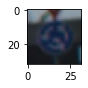

In [73]:
images = X_test[correct_ind][:10]
images

for image in images:
    plt.figure(figsize=(1, 1))
    plt.imshow(image, cmap="gray")